# Basics of XGA profiles - focusing on cluster surface brightness

Here the aim is to go through the basic capabilities of XGA profile products, with a focus on the generation of surface brightness profiles of galaxy clusters. A demonstration of the fitting functionality built into XGA profiles will be given, which will include an exploration of the XGA model classes and their purpose. I'll also show how we can view profiles (both for individually and together), and run through the user-configurable options built into the view method. 

Given the nature of this analysis, it isn't really applicable to point-like sources.

In [1]:
from xga.sources import GalaxyCluster

from astropy.units import Quantity

Firstly, I will define a GalaxyCluster source for Abell 907, a cluster for which I know high quality data is available. **Again, please note that the overdensity radius and redshift that I've used here are approximate and should not be used for a scientific analysis**:

In [2]:
src = GalaxyCluster(149.59209, -11.05972, 0.16, r500=Quantity(1200, 'kpc'), name='A907')
src.info()


-----------------------------------------------------
Source Name - A907
User Coordinates - (149.59209, -11.05972) degrees
X-ray Peak - (149.59251340970866, -11.063958320861634) degrees
nH - 0.0534 1e+22 / cm2
Redshift - 0.16
XMM ObsIDs - 3
PN Observations - 3
MOS1 Observations - 3
MOS2 Observations - 3
On-Axis - 3
With regions - 3
Total regions - 69
Obs with one match - 3
Obs with >1 matches - 0
Images associated - 18
Exposure maps associated - 18
Combined Ratemaps associated - 1
Spectra associated - 0
R500 - 1200.0 kpc
R500 SNR - 251.61
-----------------------------------------------------



## Generating and viewing a surface brightness profile

A [convenient method](../../xga.sources.html#xga.sources.extended.GalaxyCluster.view_brightness_profile) for quickly generating and viewing cluster surface brightness profiles has been implemented in the GalaxyCluster source class, with the main input being the desired outer radius of the brightness profile in question. In this demonstration I have made a profile out to the approximate R$_{500}$ that I supplied on declaration, and by default this method has used the combined brightness profile to do so:

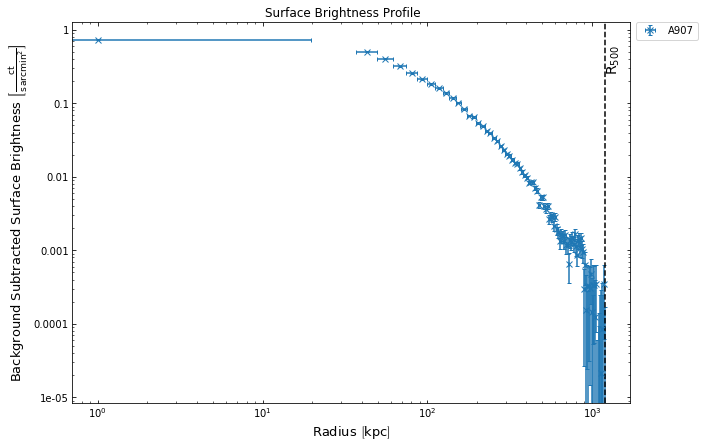

In [3]:
src.view_brightness_profile('r500')

The `view_brightness_profile` method doesn't actually create the brightness profile itself however, it is simply a wrapper around the [radial_brightness](../../xga.imagetools.html#xga.imagetools.profile.radial_brightness) function implemented in the 'imagetools' section of XGA. I will not go into detail on how the generation is undertaken, but the end result is an instance of the XGA [SurfaceBrightness1D](../../xga.products.html#xga.products.profile.SurfaceBrightness1D) class. I will mention, however, that you can supply minimum quality requirements when generating these profiles, for instance requiring each bin to have a minimum signal to noise, as shown here:

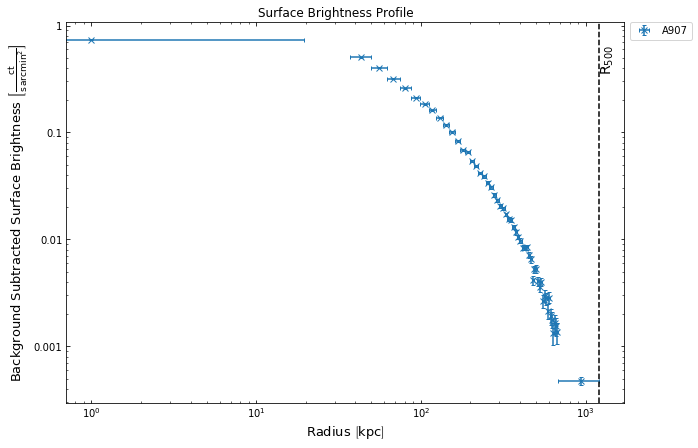

In [4]:
src.view_brightness_profile('r500', min_snr=1.1)

## Retrieving the SurfaceBrightness1D instance from the source

It is likely that you want to do more than just look at the profile, so the next step is to extract it from wherever it has been stored in the source object. Most profile types have a specific get method, but a general `get_profiles` method also exists, which I shall show first. We have to supply the profile type, with a 'combined_' prefix to indicate that the profile was generated using combined data:

In [10]:
src.get_profiles('combined_brightness')

We can see that because we only supplied the type of profile we want, both the brightness profiles we generated have been returned to us. If we specifically wanted the profile we generated out to $R_{500}$ without any automatic re-binning however, we can use the `get_1d_brightness_profile` method and tell it that the outer radius of the profile we want is R$_{500}$ (something that, after the re-binning applied to the second profile, is no longer true for both):

In [12]:
sb_prof = src.get_1d_brightness_profile('r500')
sb_prof

## Saving XGA profiles to disk

All profiles generated by XGA are automatically saved to the {xga save path}/profiles/{source name} directory, so that if the same source is declared again at some point in the future then they can be loaded back in without having to run the generation again. Running the generation procedure again for brightness profiles wouldn't be much of a problem, considering how fast it is, but other profiles take considerably more time to generate.

A profile will generally automatically re-save itself when a change (such as fitting a model) is made to it, and you can manually save it by calling the `save()` method and passing a path. 

The profile is saved by pickling the profile instance, which can result in some relatively large files if there are many points and model fits stored within the profile:

In [15]:
sb_prof.save("random_brightness_profile.xga")

If you have a profile object loaded in then you can access the automatic save path which XGA has assigned it by using the `save_path` property:

In [17]:
sb_prof.save_path

'/home/dt237/code/PycharmProjects/XGA/docs/source/notebooks/advanced_tutorials/xga_output/profiles/A907/brightness_profile_A907_8233272.xga'

## Fitting a model to the SurfaceBrightness1D instance

So, we've generated this profile, and now we've decided we want to be able to represent it with a model. You, as a new user, don't know a priori what models have been implemented for whatever profile type you're working with; as such you should call the `allowed_models()` method, which will tell you what models you're allowed to fit: 

Then you decide that you want to fit the 'beta' model